# Face Mask Prediction using Mobile-Net



Task is to predict the mask around the face in a given image.

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

In [ ]:
import keras
from keras import backend as K
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from keras.applications import MobileNet
from keras.applications.mobilenet import preprocess_input
from google.colab.patches import cv2_imshow
import numpy as np
from IPython.display import Image
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.losses import binary_crossentropy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [ ]:
#### Add your code here ####

from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install tensorflow=2.3.1

ERROR: Invalid requirement: 'tensorflow=2.3.1'
Hint: = is not a valid operator. Did you mean == ?


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [ ]:
import numpy as np
data_image = '/content/drive/My Drive/Colab Notebooks/Widerdataset/images.npy'
data = np.load(data_image,allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (3 marks)
- Hint: print data[10][1] 

In [ ]:
print(data[10][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}]


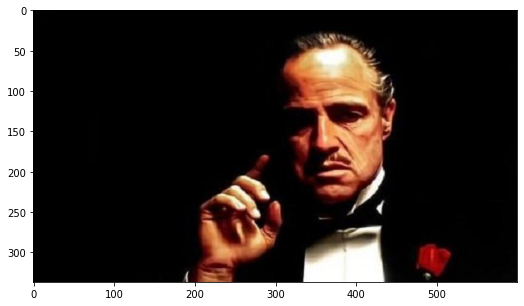

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(data[10][0])

### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [ ]:
IMAGE_HEIGHT = 224
IMAGE_WIDTH = 224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [ ]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [ ]:
data.shape

(409, 2)

### Split the data into training and testing (3 marks)
- 400 images in training
- 9 images in testing data

In [ ]:
# Split train and valid
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, masks, test_size=0.02, random_state=0)

Training data

In [ ]:
X_train = X_train #### Add your code here ####
y_train = y_train #### Add your code here ####

Testing data

In [ ]:
X_test = X_test #### Add your code here ####
y_test = y_test #### Add your code here ####

### Print a sample training image, image array and its mask (3 marks)

[link text](https://)Print the image and image array

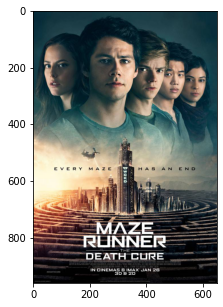

In [ ]:
plt.figure(figsize=(10,5))
plt.imshow(data[11][0])

In [ ]:
print(X_train[11])


[[[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  ...
  [ 0.98431373  0.98431373  0.98431373]
  [ 0.98431373  0.98431373  0.98431373]
  [ 0.98431373  0.98431373  1.        ]]

 [[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  ...
  [ 0.98431373  0.98431373  0.98431373]
  [ 0.98431373  0.98431373  0.98431373]
  [ 0.98431373  0.98431373  1.        ]]

 [[ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  [ 1.          1.          1.        ]
  ...
  [ 0.98431373  0.98431373  0.98431373]
  [ 0.98431373  0.98431373  0.98431373]
  [ 0.98431373  0.98431373  1.        ]]

 ...

 [[ 0.89019608  0.71764708  0.13725495]
  [ 0.81960785  0.66274512 -0.00392157]
  [ 0.92156863  0.74901962  0.13725495]
  ...
  [-0.05882353  0.13725495  0.38823533]
  [ 0.01176476  0.20000005  0.45882356]
  [-0.03529412  0.20784318  0.45882356]]

 [

Print the mask

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


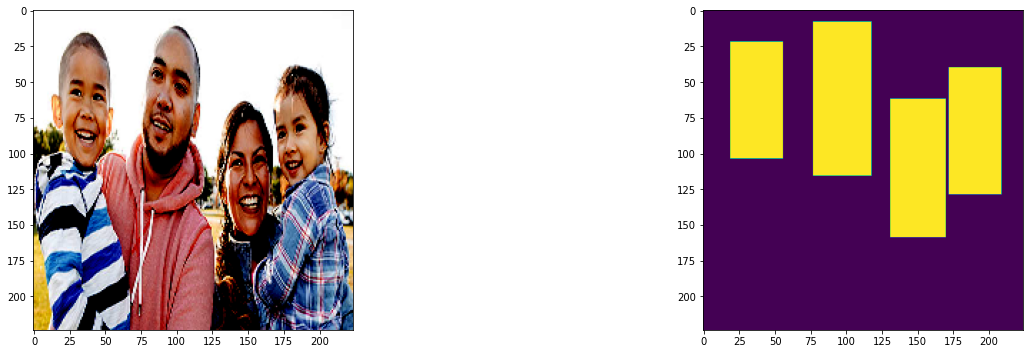

In [ ]:
# Print image and its related mask
plt.figure(figsize=(34,20))
plt.subplot(3,3,1)
plt.imshow(X_train[11])
plt.subplot(3,3,2)
plt.imshow(y_train[11])
plt.show()

## Create the model (7 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add Mobile net architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [ ]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model
def create_model(trainable=True):
    model_1 = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model_1.layers:
        layer.trainable = trainable

    block1 = model_1.get_layer("conv_pw_5_relu").output
    block2 = model_1.get_layer("conv_pw_11_relu").output
    block3 = model_1.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block3), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = UpSampling2D()(x) 
    x = UpSampling2D()(x) 
    x = UpSampling2D()(x) 
    
    x = Reshape((IMAGE_HEIGHT,IMAGE_WIDTH))(x)

    return Model(inputs=model_1.input, outputs=x)
  
    #### Add your code here ####

### Call the create_model function (2 marks)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [ ]:
model_false = create_model(False)

### Print model summary (2 marks)

In [ ]:
model_false.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
_______________________________________________________________________________________

### Define dice coefficient function (3 marks)
- Create a function to calculate dice coefficient


In [ ]:
import tensorflow as tensorflow
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tensorflow.reduce_sum(y_true * y_pred)
    denominator = tensorflow.reduce_sum(y_true + y_pred)
    return numerator / (denominator + tensorflow.keras.backend.epsilon())

### Define loss function (3 marks)

In [ ]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tensorflow.keras.backend.log(dice_coefficient(y_true, y_pred) + tensorflow.keras.backend.epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [ ]:
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [ ]:
model_false.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define callbacks (3 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True)
stop = EarlyStopping(monitor="val_loss", patience=5)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1)

### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [ ]:
model_false.fit(X_train, y_train, epochs = 100, batch_size = 1, callbacks = [checkpoint, reduce_lr, stop], validation_data = (X_test, y_test))

Epoch 1/100
390/400 [============================>.] - ETA: 0s - loss: 2.0337 - dice_coefficient: 0.2697
Epoch 00001: val_loss improved from inf to 1.20286, saving model to model-1.20.h5
400/400 [==============================] - 2s 6ms/step - loss: 2.0154 - dice_coefficient: 0.2726 - val_loss: 1.2029 - val_dice_coefficient: 0.4413
Epoch 2/100
391/400 [============================>.] - ETA: 0s - loss: 1.2929 - dice_coefficient: 0.4163
Epoch 00002: val_loss improved from 1.20286 to 1.01445, saving model to model-1.01.h5
400/400 [==============================] - 2s 4ms/step - loss: 1.2868 - dice_coefficient: 0.4178 - val_loss: 1.0144 - val_dice_coefficient: 0.5081
Epoch 3/100
393/400 [============================>.] - ETA: 0s - loss: 1.1048 - dice_coefficient: 0.4757
Epoch 00003: val_loss improved from 1.01445 to 0.89869, saving model to model-0.90.h5
400/400 [==============================] - 2s 4ms/step - loss: 1.1012 - dice_coefficient: 0.4763 - val_loss: 0.8987 - val_dice_coefficien

In [ ]:
result1 = model_false.evaluate(X_test, y_test, verbose = 1)
y_pred1 = model_false.predict(X_test, verbose = 1)

1/1 [==============================] - 0s 9ms/step


### Get the predicted mask for a test image   (3 marks)

Show the test image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


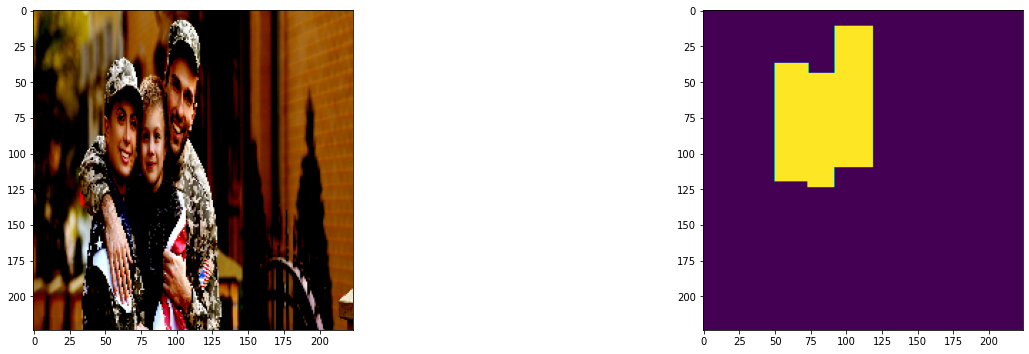

In [ ]:
# Random test image to check the prediction
plt.figure(figsize=(34,20))
plt.subplot(3,3,1)
plt.imshow(X_test[1],alpha=1)
plt.subplot(3,3,2)
plt.imshow(y_test[1],alpha=1)
plt.show()

Show original mask for test image

In [ ]:
# Test image and Mask are resized to 224 X 224
n = 1
image = cv2.resize(X_test[n], dsize = (IMAGE_HEIGHT, IMAGE_WIDTH), interpolation = cv2.INTER_CUBIC)
pred_mask1 = cv2.resize(1.0*(y_pred1[n] > 0.1), (IMAGE_WIDTH, IMAGE_HEIGHT)) # predict mask for the model1 
preds_mask_t = (pred_mask1 > 0.5).astype(np.uint8)

Predict the mask on the test image

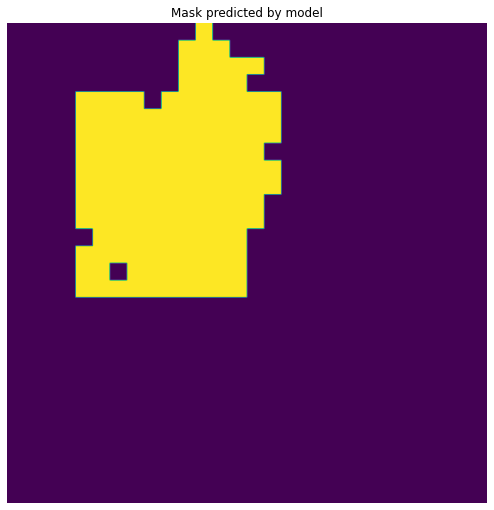

In [ ]:
plt.figure(figsize=(40,30))
plt.subplot(3,3,1)
plt.axis('off')
plt.title("Mask predicted by model")
plt.imshow(pred_mask1, alpha = 1)

### Impose the mask on the test image (3 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

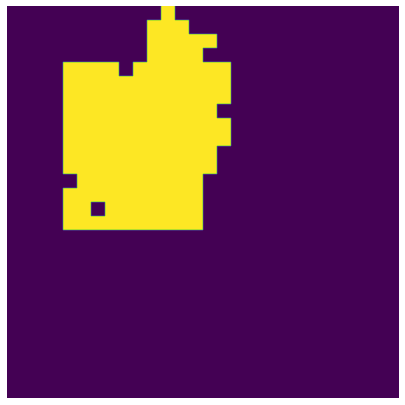

In [ ]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
plt.imshow(pred_mask1, alpha = 1)
plt.savefig('mask.jpg', bbox_inches = 'tight', pad_inches = 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


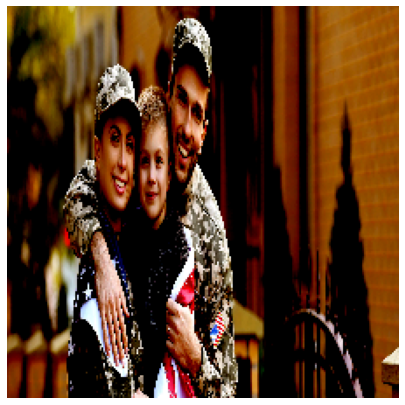

In [ ]:
fig = plt.figure(figsize = (15, 7.2))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
plt.imshow(X_test[n], alpha=1)
plt.savefig('imageformask.jpg', bbox_inches = 'tight', pad_inches = 0)

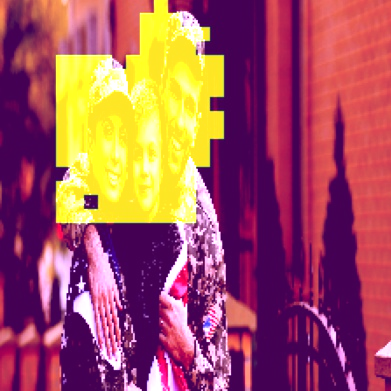

In [ ]:
from google.colab.patches import cv2_imshow

img_new = cv2.imread('imageformask.jpg', 1)
pre_mask1 = cv2.imread('mask.jpg', 1)
img = cv2.add(img_new, pre_mask1)
cv2_imshow(img) # cv2_imshow do not allow alpha parameter

## **Conclusion**

*   I have used mobile net architecture and weights from imagenet and with     
loss: 0.6787 and dice_coefficient: 0.6648 model is trained and results are obtained.


*   Image width and height are set to 224 and rest of the output model size is of same.

*   As trainable = false, executes faster i have used it to get model based on it.

*   I was able to predict mask image after training with threshold of aplha greater than 0.5, therefore aplha =1 has masked and detected face exactly as displayed in test image using semantic segmentation.


*   Succesfully masked and detected the face from given image which is our goal.



